#Predicting Hotel Booking Cancellations

#Background :
 Industry data shows that the average reservation cancellation rate is 37%, leading to losses every year. In the hospitality industry, the reservation cancellation rate is a critical factor that affects the operational balance and revenue of the hotel.

A high cancellation rate not only threatens the company's revenue, but also disrupts customer service quality.

#Objective :
The purpose of this project is to analyze and understand the factors that contribute to the reservation cancellation rate at a hotel.
Identify cancellation patterns and trends, identify key factors that influence cancellation decisions, and provide business recommendations for hotel management.
Build a machine learning model to predict booking cancellations



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dibimbing/train.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


#Description Data :

* hotel: Type of hotel (Categorical)

* is_canceled: Whether the booking was canceled or not (Binary)

* lead_time: Number of days between booking date and arrival date (Numeric)

* arrival_date_year: The year of the arrival date (Numeric)

* arrival_date_month: The month of the arrival date (Categorical)

* arrival_date_week_number: The week number of the arrival date (Numeric)

* arrival_date_day_of_month: The day of the month of the arrival date (Numeric)

* stays_in_weekend_nights: Number of weekend nights stayed or booked to stay at the hotel (Numeric)

* stays_in_week_nights: Number of week nights stayed or booked to stay at the hotel (Numeric)

* adults, children, babies: Number of guests categorized by age groups

* adults = Number of adults
* children = Number of children
* babies = Number infants

##Booking Details :

* meal: Type(s) food option(s) included in booking package (Categorical)
* country & market_segment & distribution_channel columns provide demographic and customer classification information.
* is_repeated_guest column specifies whether a guest is a repeated visitor or not.
* previous_cancellations column indicates how many previous bookings were canceled by a guest.
* previous_bookings_not_canceled shows how many previous bookings were not canceled by a guest.

#Accommodation Details:

* reserved_room_type column indicates which type room was originally reserved for each booking.
* assigned_room_type mentions which type room was finally assigned for each booking.
* booking_changes: Number of changes made to the booking before arrival.
* deposit_type: Type of deposit made for the booking (Categorical).
* agent & company columns provide relevant information about the travel agency and/or company involved in making the reservation.

#Additional Information:

* days_in_waiting_list: Number of days the booking was on a waiting list before it was confirmed or canceled.
* customer_type provides information on types of customers (Categorical)
* adr: Average daily rate per room, calculated by dividing the sum of all lodging transactions by the total number of staying nights (Numeric)


In [ ]:
data = pd.read_csv('/content/sample_data/train.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,bookingID
count,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83290.000000,83293.000000,...,83293.000000,83293.000000,83293.000000,71889.000000,4734.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000
mean,0.369503,103.914230,2018.156808,27.164023,15.786116,0.930390,2.503812,1.854466,0.103614,0.008032,...,0.086994,0.141765,0.223068,86.867282,190.003802,2.352238,101.724373,0.061818,0.571945,41647.000000
std,0.482673,106.874124,0.706656,13.623752,8.775931,1.004196,1.924511,0.606139,0.398821,0.100641,...,0.862988,1.554390,0.656237,110.875605,131.969152,17.820652,48.082552,0.245027,0.793742,24044.762323
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.530000,0.000000,0.000000,20824.000000
50%,0.000000,69.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,183.000000,0.000000,94.500000,0.000000,0.000000,41647.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,62470.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,70.000000,21.000000,535.000000,543.000000,391.000000,508.000000,8.000000,5.000000,83293.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

#Exploratory Data Analysis

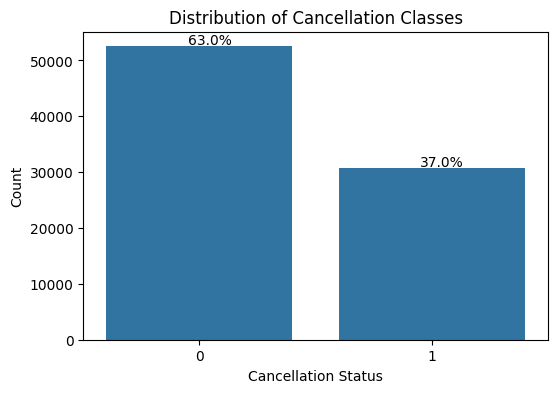

In [ ]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='is_canceled', data=data)
plt.title('Distribution of Cancellation Classes')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')

total = len(data['is_canceled'])
for p in ax.patches:
    ax.annotate(f"{100 * p.get_height() / total:.1f}%",
                (p.get_x() + p.get_width() / 2 - 0.05, p.get_height() + 300),
                size=10)


plt.show()

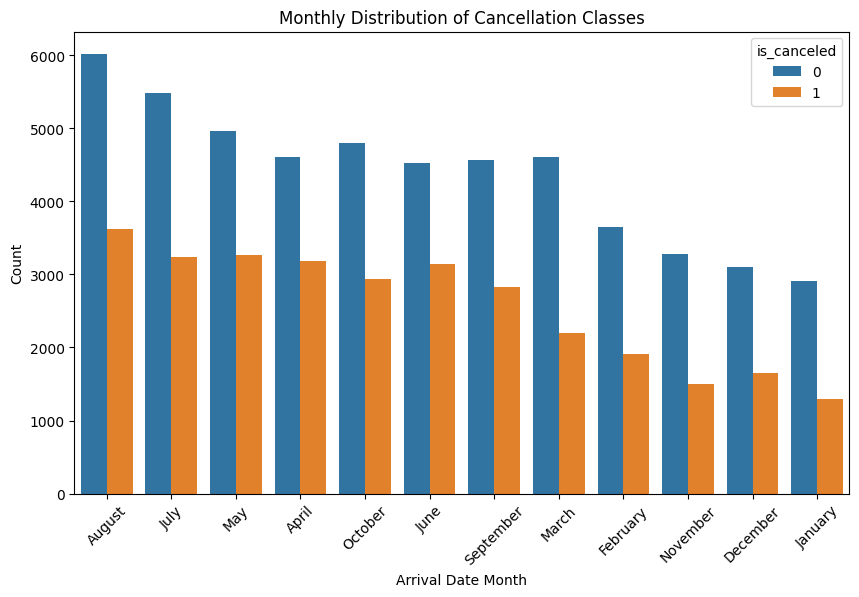

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=data, order=data['arrival_date_month'].value_counts().index)
plt.title('Monthly Distribution of Cancellation Classes')
plt.xlabel('Arrival Date Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

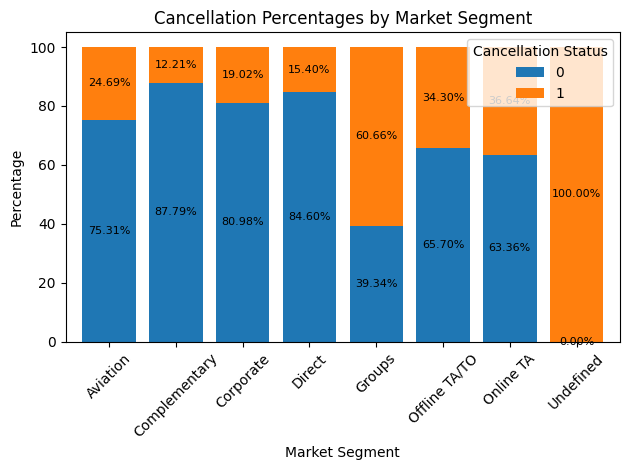

In [ ]:
plt.figure(figsize=(12, 6))
market_segment_percentages = data.groupby('market_segment')['is_canceled'].value_counts(normalize=True).unstack().fillna(0) * 100
market_segment_percentages.plot(kind='bar', stacked=True, width=0.8)
plt.title('Cancellation Percentages by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Percentage')
plt.legend(title='Cancellation Status', loc='upper right')

for i, (index, row) in enumerate(market_segment_percentages.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.iloc[:j+1].sum() - value/2, f"{value:.2f}%", ha='center', va='center', fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

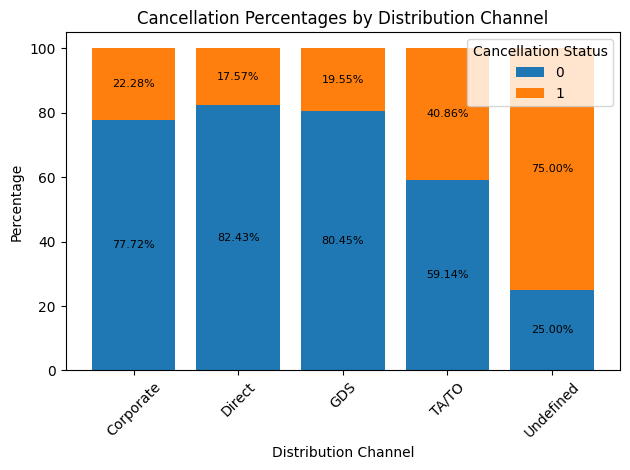

In [ ]:
plt.figure(figsize=(10, 6))
distribution_channel_percentages = data.groupby('distribution_channel')['is_canceled'].value_counts(normalize=True).unstack().fillna(0) * 100
distribution_channel_percentages.plot(kind='bar', stacked=True, width=0.8)
plt.title('Cancellation Percentages by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Percentage')
plt.legend(title='Cancellation Status', loc='upper right')

for i, (index, row) in enumerate(distribution_channel_percentages.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.iloc[:j+1].sum() - value/2, f"{value:.2f}%", ha='center', va='center', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(data['required_car_parking_spaces'].unique())

[0 1 8 2 3]


<Figure size 800x600 with 0 Axes>

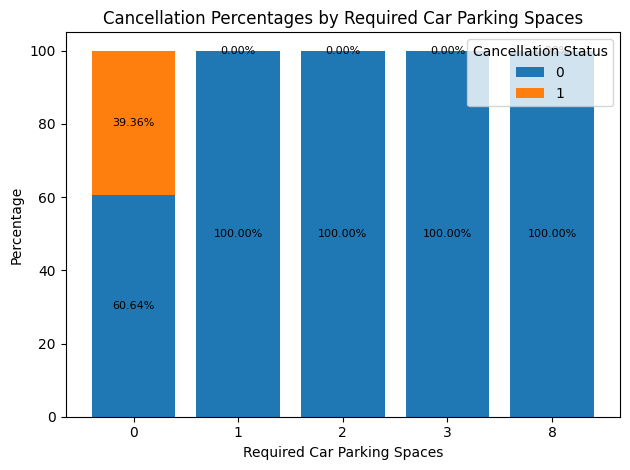

In [ ]:
plt.figure(figsize=(8, 6))
parking_space_percentages = data.groupby('required_car_parking_spaces')['is_canceled'].value_counts(normalize=True).unstack().fillna(0) * 100
parking_space_percentages.plot(kind='bar', stacked=True, width=0.8)
plt.title('Cancellation Percentages by Required Car Parking Spaces')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Percentage')
plt.legend(title='Cancellation Status', loc='upper right')

for i, (index, row) in enumerate(parking_space_percentages.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.iloc[:j+1].sum() - value/2, f"{value:.2f}%", ha='center', va='center', fontsize=8)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

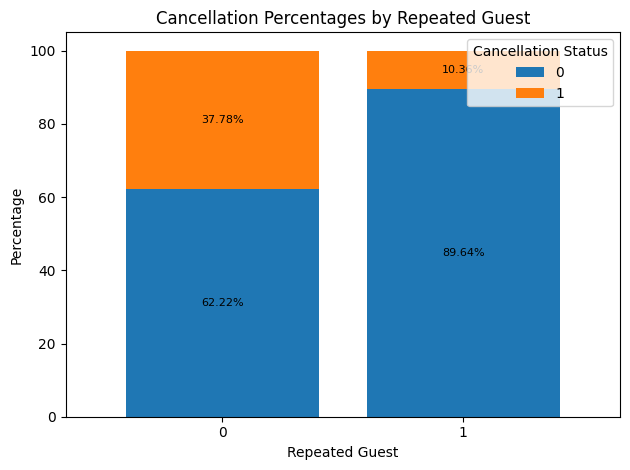

In [ ]:
plt.figure(figsize=(6, 4))
repeated_guest_percentages = data.groupby('is_repeated_guest')['is_canceled'].value_counts(normalize=True).unstack().fillna(0) * 100
repeated_guest_percentages.plot(kind='bar', stacked=True, width=0.8)
plt.title('Cancellation Percentages by Repeated Guest')
plt.xlabel('Repeated Guest')
plt.ylabel('Percentage')
plt.legend(title='Cancellation Status', loc='upper right')

for i, (index, row) in enumerate(repeated_guest_percentages.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.iloc[:j+1].sum() - value/2, f"{value:.2f}%", ha='center', va='center', fontsize=8)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

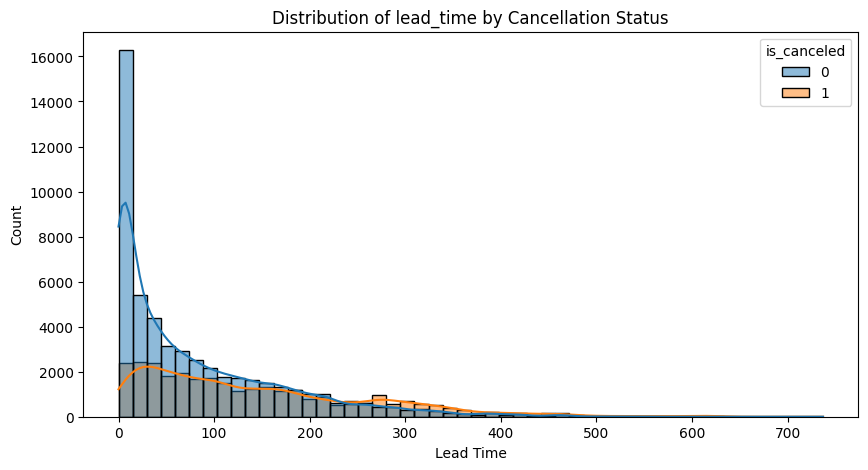

In [ ]:
# Visualisasi distribusi lead_time terhadap kelas target
plt.figure(figsize=(10, 5))
sns.histplot(x='lead_time', hue='is_canceled', data=data, bins=50, kde=True)
plt.title('Distribution of lead_time by Cancellation Status')
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.show()

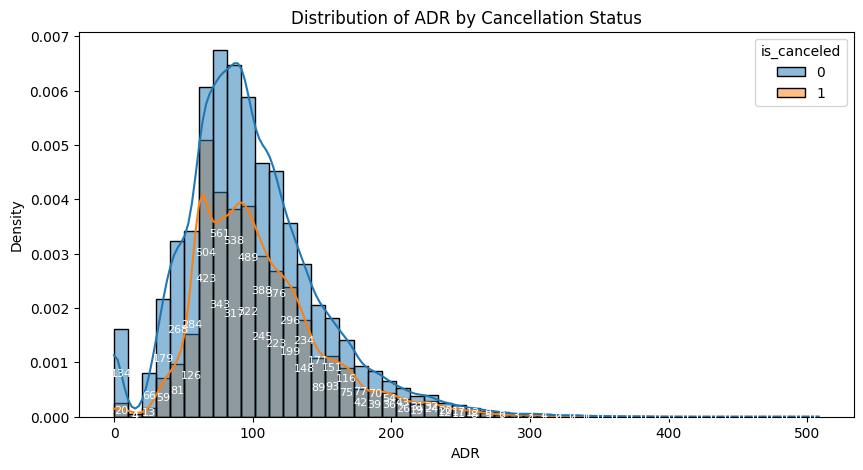

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi adr terhadap kelas target
plt.figure(figsize=(10, 5))

# Menggunakan histplot dari seaborn dengan membagi data berdasarkan kelas target (hue='is_canceled')
plot = sns.histplot(x='adr', hue='is_canceled', data=data, bins=50, kde=True, stat='density')

# Menambahkan judul dan label pada sumbu
plt.title('Distribution of ADR by Cancellation Status')
plt.xlabel('ADR')
plt.ylabel('Density')

# Menambahkan jumlah di dalam batang histogram
for bar in plot.patches:
    height = bar.get_height()
    plot.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{int(height * len(data))}', ha='center', va='center', color='white', fontsize=8)

# Menampilkan plot
plt.show()


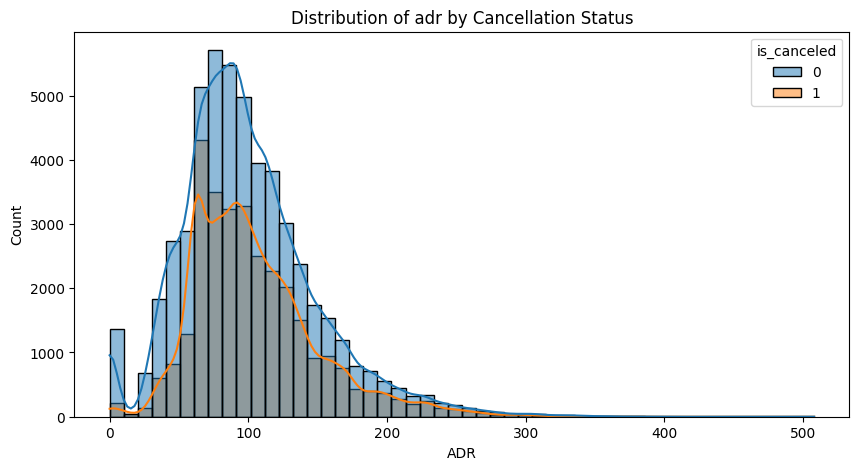

In [ ]:
# Visualisasi distribusi adr terhadap kelas target
plt.figure(figsize=(10, 5))
sns.histplot(x='adr', hue='is_canceled', data=data, bins=50, kde=True)
plt.title('Distribution of adr by Cancellation Status')
plt.xlabel('ADR')
plt.ylabel('Count')
plt.show()

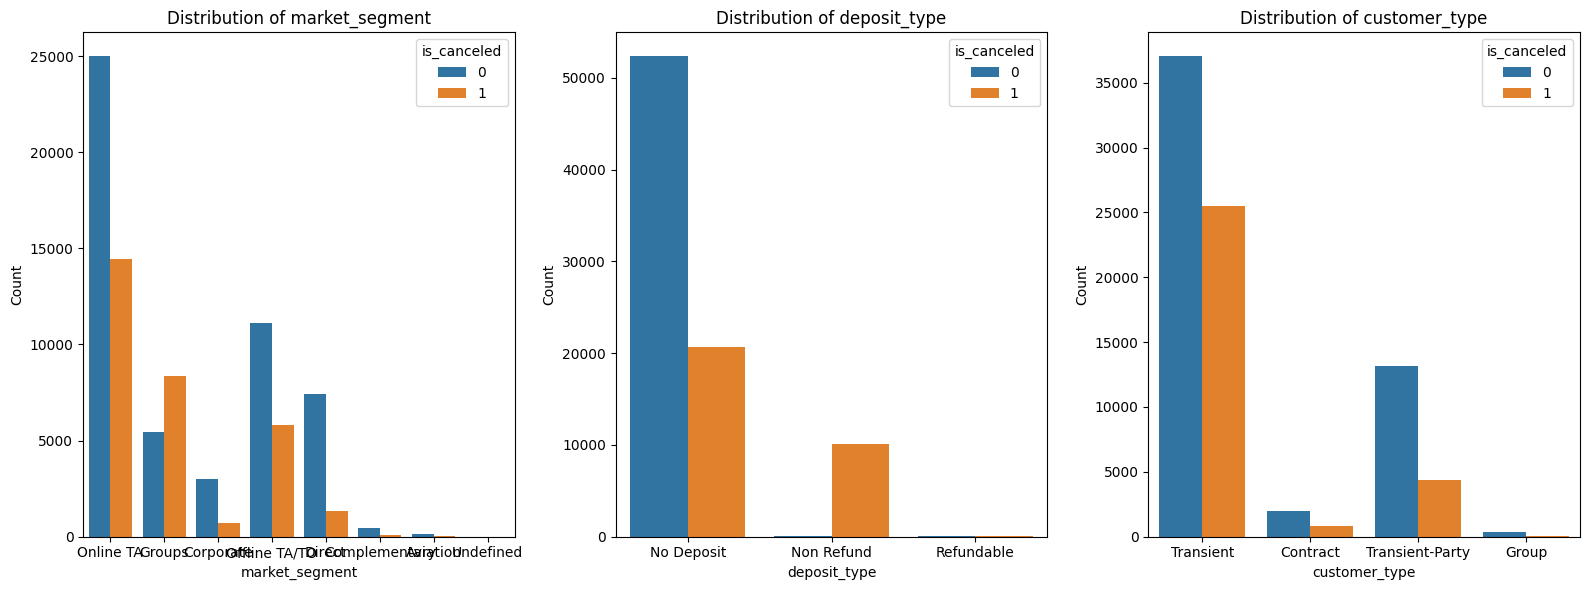

In [ ]:
# Distribusi fitur kategorikal
cat_features = ['market_segment', 'deposit_type', 'customer_type']
plt.figure(figsize=(16, 6))
for feature in cat_features:
    plt.subplot(1, len(cat_features), cat_features.index(feature) + 1)
    sns.countplot(x=feature, hue='is_canceled', data=data)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

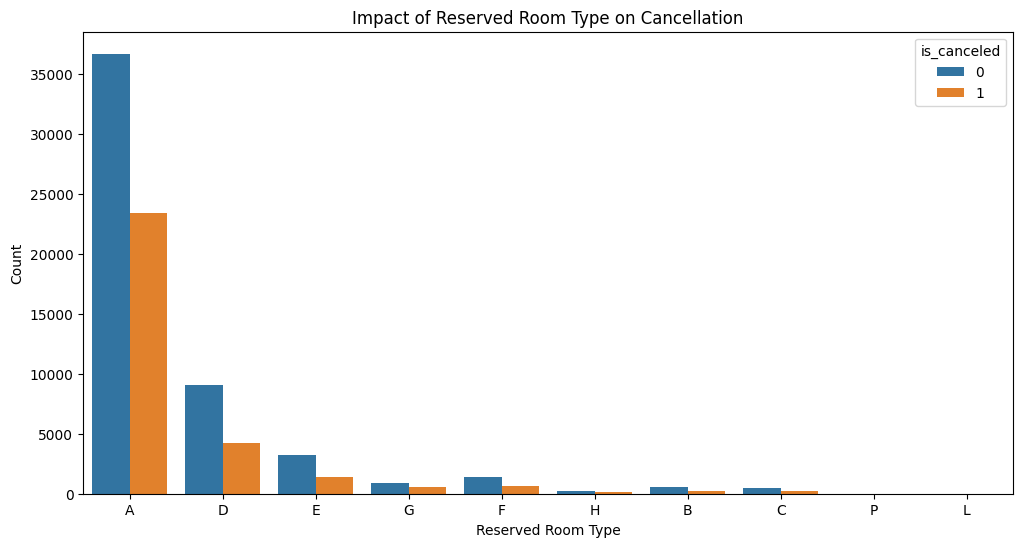

In [ ]:
# Analisis pengaruh tipe kamar terhadap pembatalan
plt.figure(figsize=(12, 6))
sns.countplot(x='reserved_room_type', hue='is_canceled', data=data)
plt.title('Impact of Reserved Room Type on Cancellation')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.show()

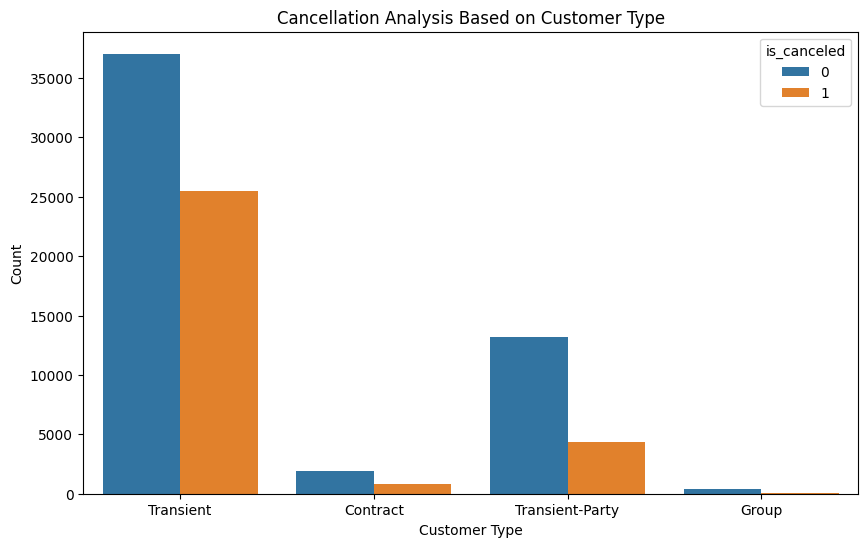

In [ ]:
# Analisis pembatalan berdasarkan jenis pelanggan
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=data)
plt.title('Cancellation Analysis Based on Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

<ipython-input-19-cd3b0248d3bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_cancellations.index, y=monthly_cancellations.values, palette='viridis')


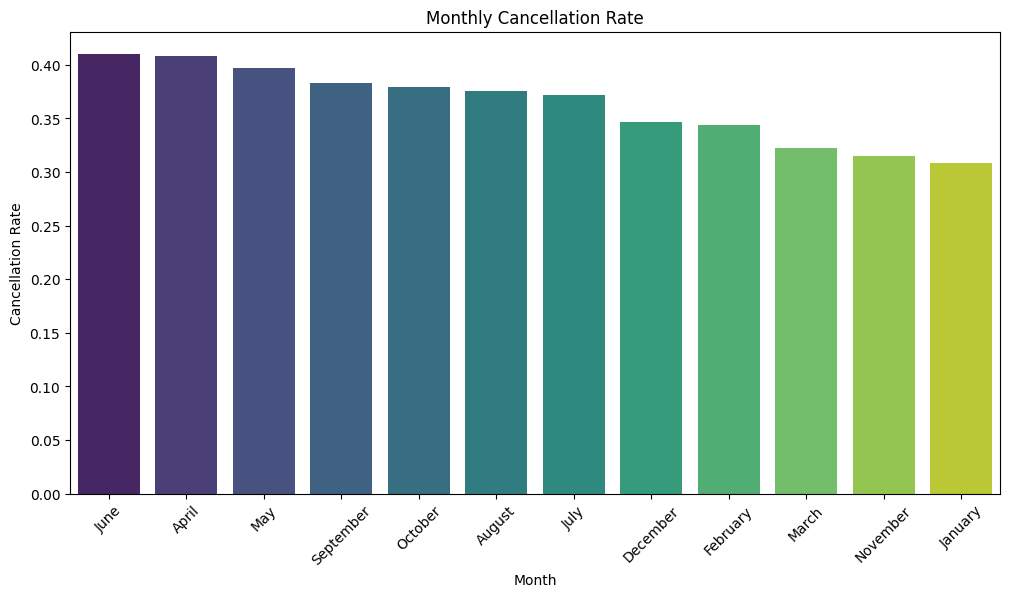

In [ ]:
# Visualisasi pengaruh musiman
monthly_cancellations = data.groupby('arrival_date_month')['is_canceled'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_cancellations.index, y=monthly_cancellations.values, palette='viridis')
plt.title('Monthly Cancellation Rate')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

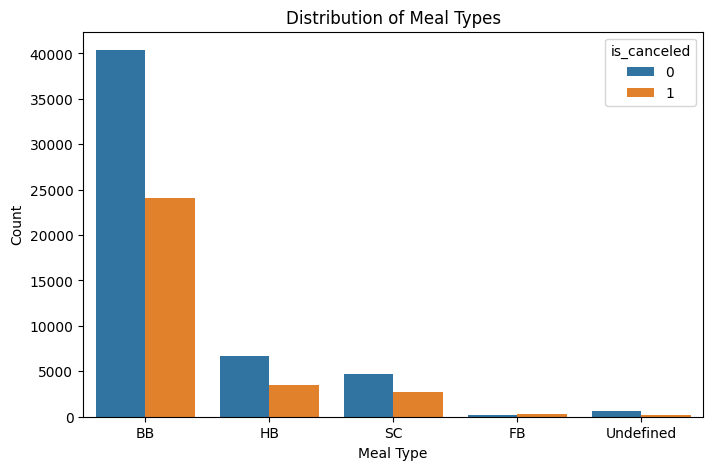

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='meal', hue='is_canceled', data=data)
plt.title('Distribution of Meal Types')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.show()

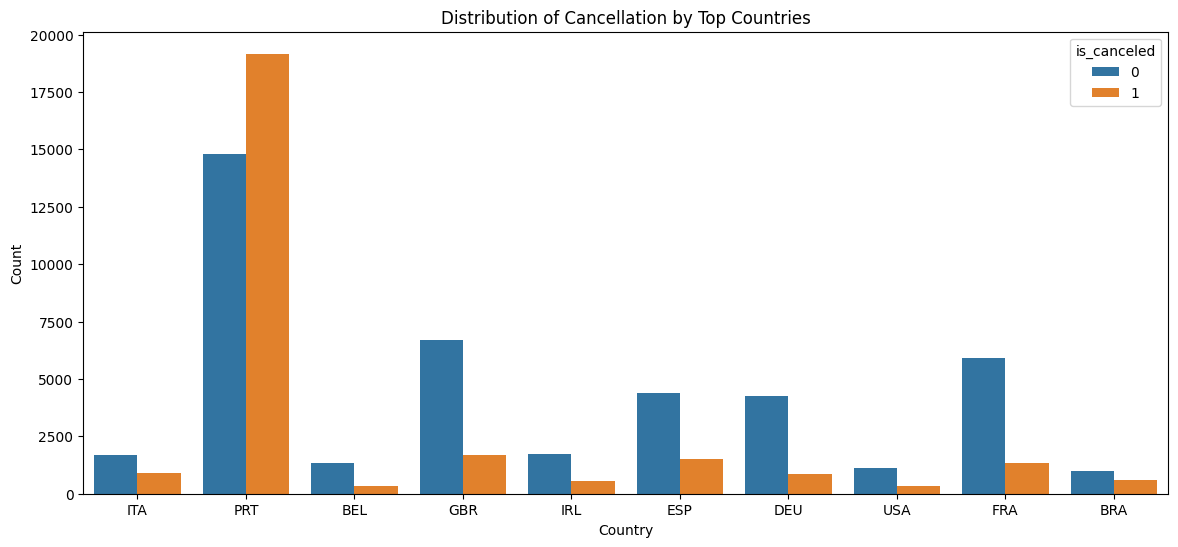

In [ ]:
# Jika Anda ingin melihat beberapa negara utama
top_countries = data['country'].value_counts().head(10).index
plt.figure(figsize=(14, 6))
sns.countplot(x='country', hue='is_canceled', data=data[data['country'].isin(top_countries)])
plt.title('Distribution of Cancellation by Top Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

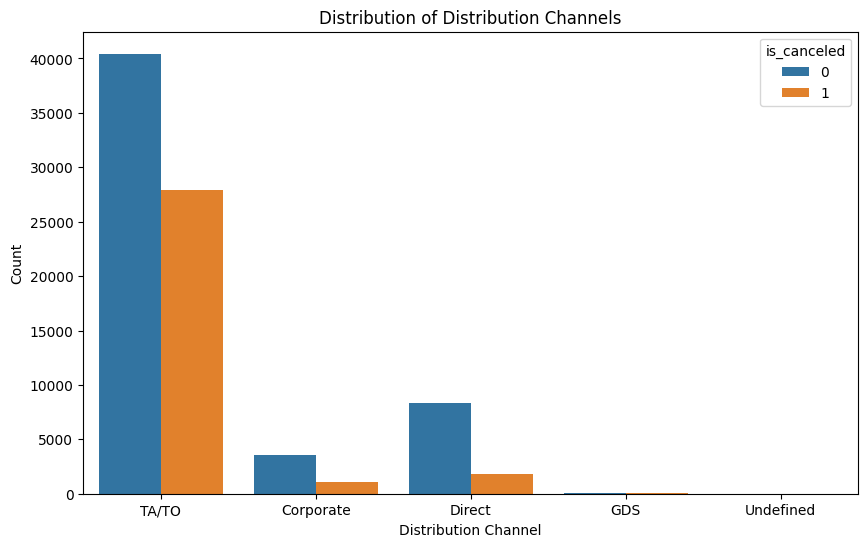

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel', hue='is_canceled', data=data)
plt.title('Distribution of Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.show()

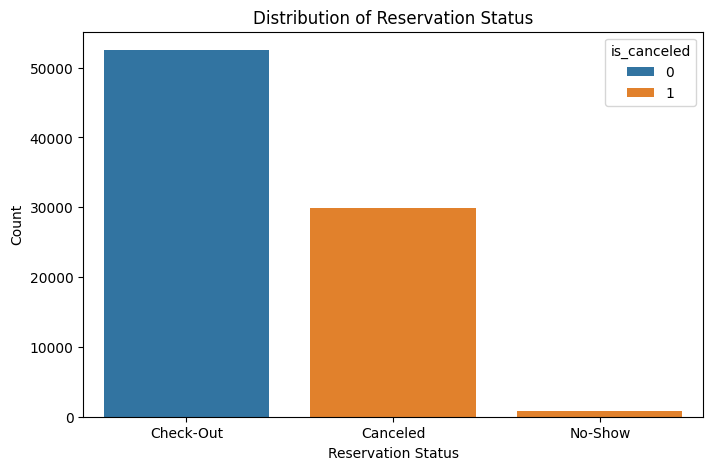

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=data)
plt.title('Distribution of Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.show()

<ipython-input-51-6abacf171481>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


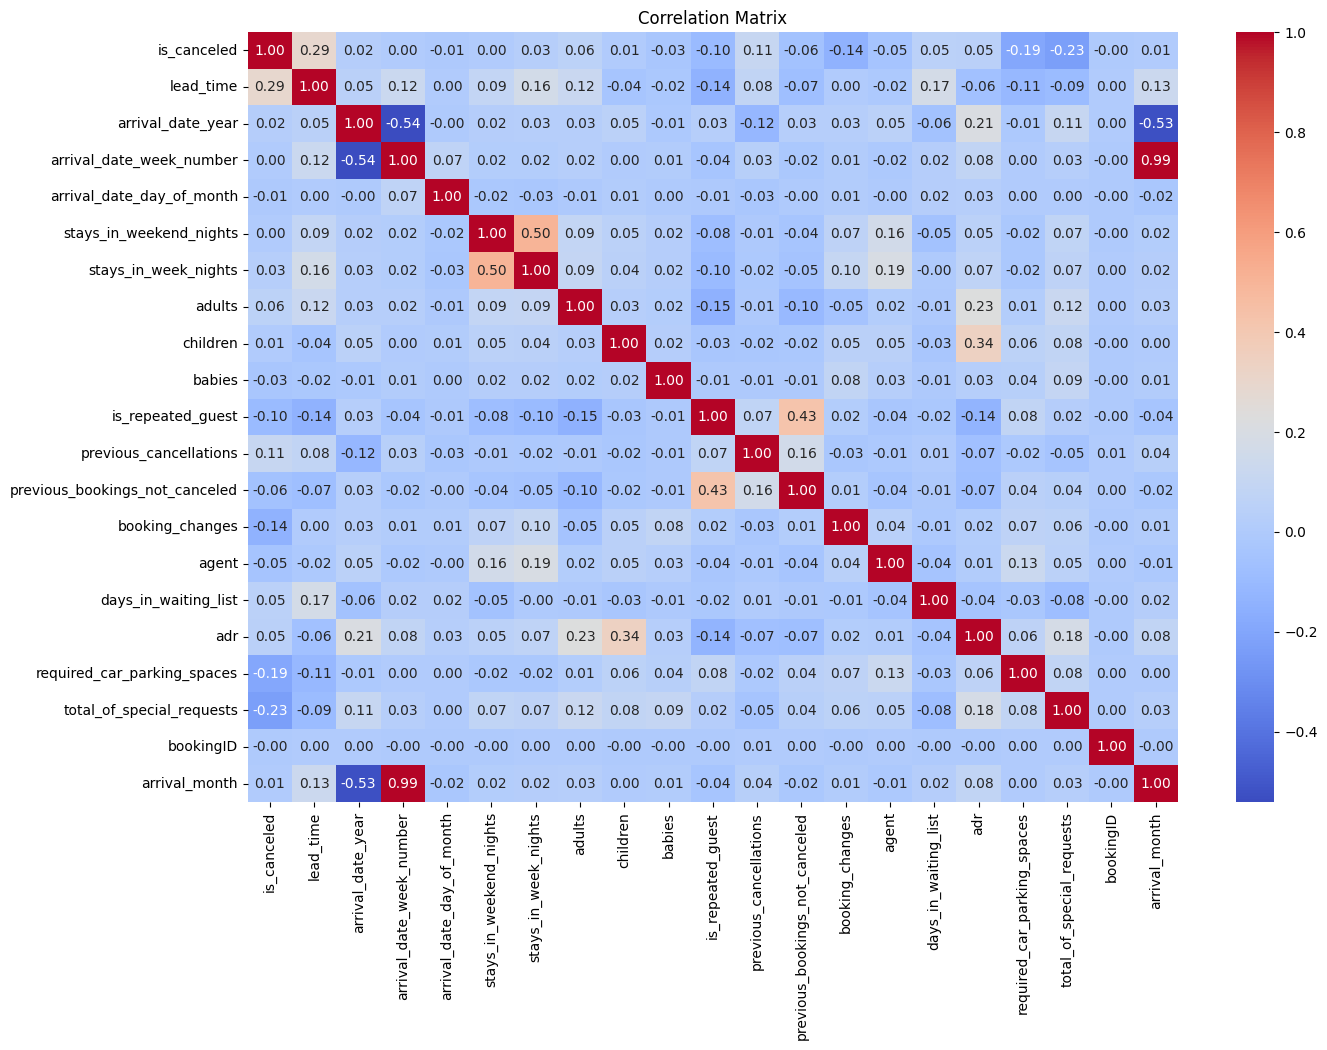

In [ ]:
# Korelasi antara fitur numerik
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#Preprocessing Data

In [ ]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                 

In [ ]:
data['agent'].fillna(data['agent'].median(), inplace=True)
data['children'].fillna(0, inplace=True)  # Replace missing 'children' with 0
data['country'].fillna('Unknown', inplace=True)  # Replace missing 'country' with 'Unknown'
data.drop(['company'], axis=1, inplace=True) #Drop column

In [ ]:
data.drop(['hotel'], axis=1, inplace=True)

In [ ]:
#data.drop(['bookingID', 'company'], axis=1, inplace=True)


In [ ]:
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str), errors='coerce')
# Ganti tanggal 29 Februari jadi tgl 28 Feb
data.loc[(data['arrival_date_day_of_month'] == 29) & (data['arrival_date_month'] == 'February') & ~data['arrival_date_year'].astype(str).str.endswith('00'), 'arrival_date_day_of_month'] = 28
print(data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date']])

       arrival_date_year arrival_date_month  arrival_date_day_of_month  \
0                   2019            January                         10   
1                   2018           December                         15   
2                   2019                May                         19   
3                   2018            October                         17   
4                   2017          September                         26   
...                  ...                ...                        ...   
83288               2018            October                         25   
83289               2017          September                         14   
83290               2019               June                         21   
83291               2018               July                         31   
83292               2018            October                         20   

      arrival_date  
0       2019-01-10  
1       2018-12-15  
2       2019-05-19  
3       2018-10-17  
4     

In [ ]:
print(data['meal'].unique())
print(data['country'].unique())
print(data['market_segment'].unique())
print(data['distribution_channel'].unique())
print(data['reserved_room_type'].unique())
print(data['assigned_room_type'].unique())
print(data['deposit_type'].unique())
print(data['customer_type'].unique())
print(data['reservation_status'].unique())

['BB' 'HB' 'SC' 'FB' 'Undefined']
['ITA' 'PRT' 'Unknown' 'BEL' 'DNK' 'GBR' 'IRL' 'ESP' 'DEU' 'RUS' 'NOR'
 'CN' 'USA' 'AUS' 'CHE' 'NLD' 'FRA' 'CHN' 'TUR' 'BRA' 'KOR' 'PLW' 'ZAF'
 'POL' 'HUN' 'MOZ' 'HKG' 'IND' 'LUX' 'MAR' 'FIN' 'ISR' 'DZA' 'SWE' 'CYP'
 'GRC' 'OMN' 'AUT' 'JPN' 'SVN' 'AGO' 'MCO' 'ARG' 'MYS' 'LVA' 'LTU' 'MEX'
 'STP' 'SAU' 'MRT' 'NGA' 'SVK' 'COL' 'THA' 'ROU' 'SUR' 'BGR' 'EST' 'ARE'
 'VEN' 'SGP' 'BIH' 'CHL' 'HRV' 'URY' 'TWN' 'ALB' 'GNB' 'BLR' 'SRB' 'GEO'
 'CUB' 'CZE' 'ZMB' 'ZWE' 'BHR' 'KEN' 'IRN' 'PER' 'ISL' 'TJK' 'LBN' 'NZL'
 'MAC' 'SEN' 'PHL' 'JOR' 'AND' 'DJI' 'KAZ' 'GTM' 'IRQ' 'GAB' 'LBY' 'MDV'
 'TUN' 'EGY' 'UKR' 'GIB' 'PRY' 'KWT' 'KNA' 'IDN' 'CPV' 'GLP' 'COM' 'AZE'
 'UGA' 'MKD' 'LAO' 'SYC' 'MLT' 'PAK' 'QAT' 'AIA' 'FJI' 'DOM' 'ECU' 'PRI'
 'CRI' 'CAF' 'MMR' 'ARM' 'SLV' 'TZA' 'HND' 'BEN' 'KHM' 'FRO' 'BFA' 'RWA'
 'BOL' 'VNM' 'BRB' 'TMP' 'BGD' 'MUS' 'NPL' 'ABW' 'ETH' 'CMR' 'PAN' 'CIV'
 'MYT' 'JAM' 'SYR' 'UZB' 'UMI' 'LKA' 'JEY' 'ASM' 'CYM' 'NIC' 'KIR' 'GHA'
 'SDN' 'MNE' 'DMA' '

In [ ]:
# Check for NaT values
print("Number of NaT values in 'arrival_date':", data['arrival_date'].isna().sum())

Number of NaT values in 'arrival_date': 0


In [ ]:
# Display rows with invalid values in the columns related to date
invalid_date_rows = data[data['arrival_date'].isna()]
print("Rows with invalid values in date-related columns:")
print(invalid_date_rows[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']])


Rows with invalid values in date-related columns:
       arrival_date_year arrival_date_month  arrival_date_day_of_month
1565                2018           February                         28
3069                2018           February                         28
3081                2018           February                         28
3792                2018           February                         28
4488                2018           February                         28
...                  ...                ...                        ...
77857               2018           February                         28
78926               2018           February                         28
79306               2018           February                         28
81571               2018           February                         28
82232               2018           February                         28

[65 rows x 3 columns]


In [ ]:
# Identifikasi baris dengan tanggal 29 Februari di tahun bukan tahun kabisat
invalid_leap_year_rows = data[(data['arrival_date_day_of_month'] == 29) & (data['arrival_date_month'] == 'February') & ~data['arrival_date_year'].astype(str).str.endswith('00')]
print("Rows with invalid leap year dates:")
print(invalid_leap_year_rows[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']])


Rows with invalid leap year dates:
Empty DataFrame
Columns: [arrival_date_year, arrival_date_month, arrival_date_day_of_month]
Index: []


In [ ]:
# Ekstrak bulan dari kolom 'arrival_date'
data['arrival_month'] = data['arrival_date'].dt.month

print(data[['arrival_date', 'arrival_month']])


      arrival_date  arrival_month
0       2019-01-10              1
1       2018-12-15             12
2       2019-05-19              5
3       2018-10-17             10
4       2017-09-26              9
...            ...            ...
83288   2018-10-25             10
83289   2017-09-14              9
83290   2019-06-21              6
83291   2018-07-31              7
83292   2018-10-20             10

[83293 rows x 2 columns]


In [ ]:
data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis=1, inplace=True)

In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors='coerce')

In [ ]:
#Frequency encoding

columns_for_frequency_encoding = ['country', 'reserved_room_type', 'assigned_room_type']

for column in columns_for_frequency_encoding:
    frequency_encoding = data[column].value_counts(normalize=True).to_dict()
    data[column+'_freq_encoded'] = data[column].map(frequency_encoding)
    data.drop(columns=[column], inplace=True)

In [ ]:
# One-hot encoding
columns_to_encode = ['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']
data_encoded = pd.get_dummies(data, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)


In [ ]:
# Konversi tipe data
data_encoded['children'] = data_encoded['children'].astype(int)
data_encoded['arrival_month'] = data_encoded['arrival_month'].astype(int)

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   is_canceled                      83293 non-null  int64         
 1   lead_time                        83293 non-null  int64         
 2   stays_in_weekend_nights          83293 non-null  int64         
 3   stays_in_week_nights             83293 non-null  int64         
 4   adults                           83293 non-null  int64         
 5   children                         83293 non-null  float64       
 6   babies                           83293 non-null  int64         
 7   is_repeated_guest                83293 non-null  int64         
 8   previous_cancellations           83293 non-null  int64         
 9   previous_bookings_not_canceled   83293 non-null  int64         
 10  booking_changes                  83293 non-null  int64    

In [ ]:
# Korelasi antara fitur-fitur numerik & variabel target
correlation_matrix = data_encoded.corr()
correlation_with_target = correlation_matrix['is_canceled'].sort_values(ascending=False)
print(correlation_with_target)


<ipython-input-21-97b7931ee390>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


is_canceled                        1.000000
deposit_type_Non Refund            0.482846
country_freq_encoded               0.322381
lead_time                          0.290870
market_segment_Groups              0.218772
assigned_room_type_freq_encoded    0.190217
distribution_channel_TA/TO         0.173161
customer_type_Transient            0.137557
reservation_status_No-Show         0.132952
previous_cancellations             0.106460
reserved_room_type_freq_encoded    0.064943
adults                             0.059303
days_in_waiting_list               0.054710
adr                                0.046884
meal_FB                            0.040133
stays_in_week_nights               0.025387
children                           0.006436
arrival_month                      0.006206
distribution_channel_Undefined     0.005463
market_segment_Undefined           0.004526
stays_in_weekend_nights            0.001743
meal_SC                            0.000202
bookingID                       

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   is_canceled                      83293 non-null  int64         
 1   lead_time                        83293 non-null  int64         
 2   stays_in_weekend_nights          83293 non-null  int64         
 3   stays_in_week_nights             83293 non-null  int64         
 4   adults                           83293 non-null  int64         
 5   children                         83293 non-null  int64         
 6   babies                           83293 non-null  int64         
 7   is_repeated_guest                83293 non-null  int64         
 8   previous_cancellations           83293 non-null  int64         
 9   previous_bookings_not_canceled   83293 non-null  int64         
 10  booking_changes                  83293 non-null  int64    

#Feature Selection with RFE

In [ ]:
features = ['deposit_type_Non Refund','country_freq_encoded', 'lead_time', 'total_of_special_requests','distribution_channel_Direct', 'previous_cancellations', 'adults',
            'days_in_waiting_list','adr','children','babies', 'agent','stays_in_weekend_nights', 'stays_in_week_nights', 'assigned_room_type_freq_encoded',
            'market_segment_Offline TA/TO','customer_type_Transient', 'arrival_month','previous_bookings_not_canceled', 'is_repeated_guest', 'booking_changes',
            'required_car_parking_spaces']
X = data_encoded[features]
y = data_encoded['is_canceled']


from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

num_features_to_select = 15  # Sesuaikan sesuai kebutuhan
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Melatih RFE pada data
X_rfe = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['deposit_type_Non Refund', 'country_freq_encoded', 'lead_time',
       'total_of_special_requests', 'previous_cancellations', 'adr', 'agent',
       'stays_in_weekend_nights', 'stays_in_week_nights',
       'assigned_room_type_freq_encoded', 'market_segment_Offline TA/TO',
       'customer_type_Transient', 'arrival_month', 'booking_changes',
       'required_car_parking_spaces'],
      dtype='object')


In [ ]:
X_selected = X[selected_features]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


#Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

models = [
    LogisticRegression(),
    xgb.XGBClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(random_state=42)
]

# Train each model using the train_model function
trained_models = [train_model(model, X_train, y_train) for model in models]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import f1_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import confusion_matrix

# List of trained models
models = [
    ("Logistic Regression", trained_models[0]),
    ("XGBoost", trained_models[1]),
    ("Decision Tree", trained_models[2]),
    ("Random Forest", trained_models[3]),
    ("Gradient Boosting", trained_models[4])
]

for model_name, model in models:
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    precision = precision_score(y_test, y_pred)

    print(f"{model_name}:")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"AUC: {auc}")
    print(f"Precision: {precision}")
    print("")

    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    false_negative_rate = fn / (fn + tp)
    print(f"False Negative Rate: {false_negative_rate}")
    print("----------------------")



Logistic Regression:
F1 Score: 0.6882679530354054
Recall: 0.6111200905123646
AUC: 0.8351484491558793
Precision: 0.7877083333333333

False Negative Rate: 0.38887990948763534
----------------------
XGBoost:
F1 Score: 0.8227502276678532
Recall: 0.8031356069177307
AUC: 0.9444421078450923
Precision: 0.843346911065852

False Negative Rate: 0.19686439308226927
----------------------
Decision Tree:
F1 Score: 0.7898585280559528
Recall: 0.8031356069177307
AUC: 0.835687380437283
Precision: 0.7770132916340892

False Negative Rate: 0.19686439308226927
----------------------
Random Forest:
F1 Score: 0.8358234010407923
Recall: 0.8047518991433651
AUC: 0.9509352439125731
Precision: 0.8693906059018683

False Negative Rate: 0.19524810085663488
----------------------
Gradient Boosting:
F1 Score: 0.7731019522776573
Recall: 0.7200581865201229
AUC: 0.9209280193703178
Precision: 0.8345822405395279

False Negative Rate: 0.2799418134798772
----------------------


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Evaluate the best model on the test set
y_pred_best_model = best_rf_model.predict(X_test)

# Calculate performance metrics
f1_best_model = f1_score(y_test, y_pred_best_model)
recall_best_model = recall_score(y_test, y_pred_best_model)
precision_best_model = precision_score(y_test, y_pred_best_model)
auc_best_model = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Print the performance metrics
print("Best Model Performance Metrics:")
print(f"F1 Score: {f1_best_model}")
print(f"Recall: {recall_best_model}")
print(f"Precision: {precision_best_model}")
print(f"AUC: {auc_best_model}")

Best Model Performance Metrics:
F1 Score: 0.8384557407252324
Recall: 0.809115888152578
Precision: 0.870003475842892
AUC: 0.9521200361214766


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_best_model)

# Extract the values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate FNR
false_negative_rate = fn / (fn + tp)
print(f"False Negative Rate: {false_negative_rate}")


False Negative Rate: 0.19088411184742202


#Handling Imbalance Data (SMOTE)

In [ ]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

X_selected = data_encoded[selected_features]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#SMOTE
smote = SMOTE(random_state=42)
X_resampled_selected, y_resampled = smote.fit_resample(X_train_selected, y_train)

model_rf_resampled_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_resampled_selected.fit(X_resampled_selected, y_resampled)

y_pred_rf_resampled_selected = model_rf_resampled_selected.predict(X_test_selected)

f1_best_model = f1_score(y_test, y_pred_rf_resampled_selected)
recall_best_model = recall_score(y_test, y_pred_rf_resampled_selected)
precision_best_model = precision_score(y_test, y_pred_rf_resampled_selected)
auc_best_model = roc_auc_score(y_test, model_rf_resampled_selected.predict_proba(X_test_selected)[:, 1])

print(f"F1 Score: {f1_best_model}")
print(f"Recall: {recall_best_model}")
print(f"Precision: {precision_best_model}")
print(f"AUC: {auc_best_model}")

F1 Score: 0.8380345024936636
Recall: 0.8283497656376273
Precision: 0.8479483785572468
AUC: 0.9497538395583632


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf_resampled_selected)

fn = conf_matrix[1, 0]
tp = conf_matrix[1, 1]

fnr = fn / (fn + tp)

print("False Negative Rate (FNR):", fnr)

False Negative Rate (FNR): 0.17165023436237273


#Feature Importance with SHAP Value

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 11.5 MB/s eta 0:00:00


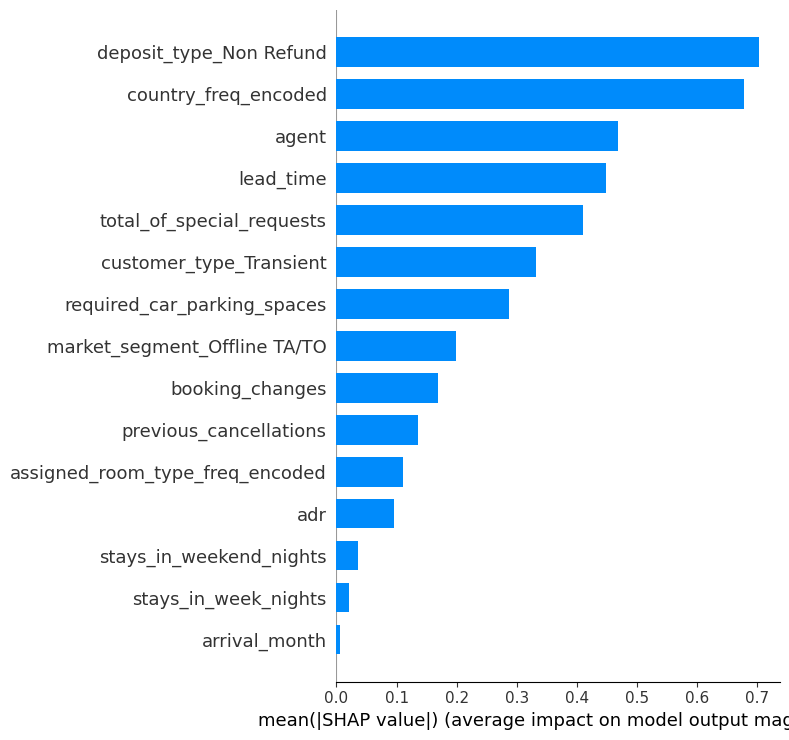

In [ ]:
import shap


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type='bar')